<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [8]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-07-29 20:26:11--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite.2’

survey-results-publ 100%[===================>] 201.62M  63.1MB/s    in 3.2s    

2025-07-29 20:26:17 (63.4 MB/s) - ‘survey-results-public.sqlite.2’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [6]:
!pip install pandas

In [9]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 117.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 138.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 79.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 112.3 MB/s eta 0:00:00


In [10]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [11]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [12]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [13]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


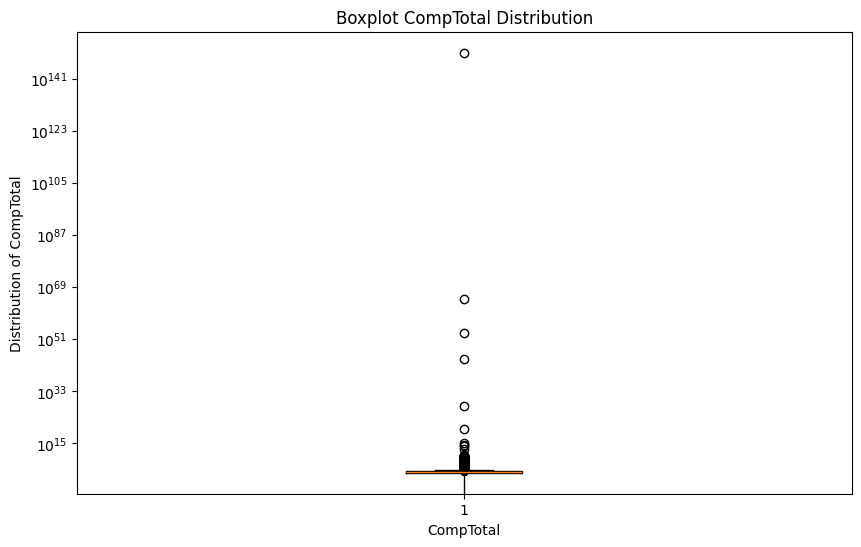

In [19]:
query = "SELECT CompTotal FROM main"
df = pd.read_sql_query(query, conn)

#filter NaN
df_valid = df.dropna(subset=['CompTotal'])
#plot
plt.figure(figsize=(10,6)) 
plt.boxplot(x=df_valid['CompTotal'])
plt.yscale('log')
plt.xlabel('CompTotal') 
plt.ylabel('Distribution of CompTotal') 
plt.title('Boxplot CompTotal Distribution')
plt.show() 

**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


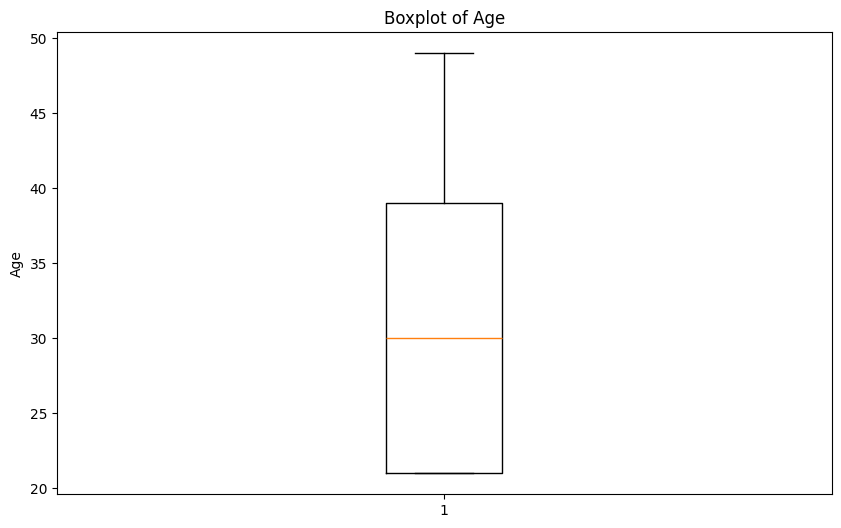

In [23]:
query = "SELECT Age FROM main" 
df = pd.read_sql_query(query, conn) 
#df['Age'].unique() 
#Age mapping 
age_map = {
    'Under 18': 17,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 70
}
df_age['AgeNum'] = df['Age'].map(age_map)
#drop NaN values
df_age_valid = df_age.dropna(subset=['AgeNum'])
#Boxplot
plt.figure(figsize=(10,6)) 
plt.boxplot(df_age_valid['AgeNum']) 
plt.ylabel('Age')
plt.title('Boxplot of Age')
plt.show() 


### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


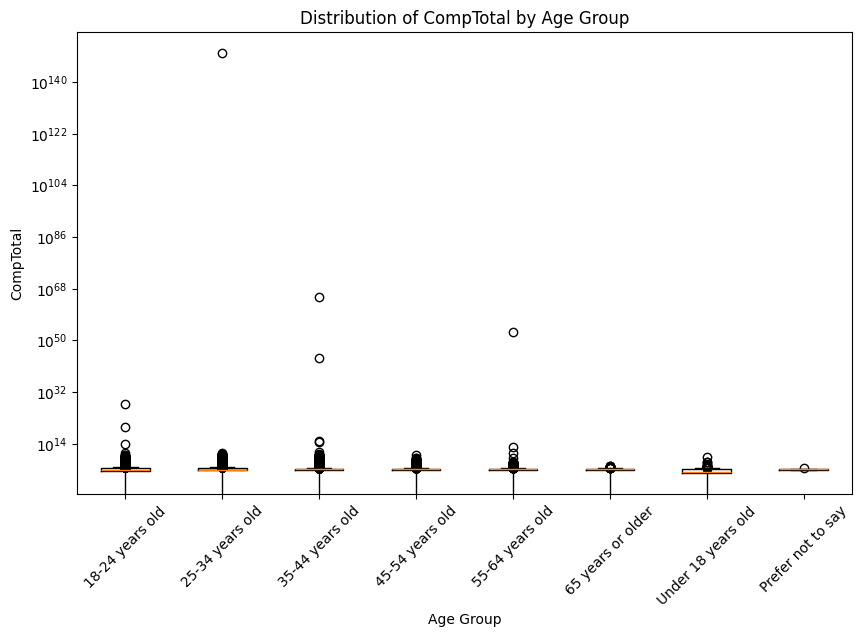

In [35]:
query = "SELECT Age, CompTotal FROM main" 
df_group = pd.read_sql_query(query, conn) 

#Filter nulls 
df_group = df_group.dropna(subset=['Age', 'CompTotal']) 
#Group by age and COmptotal
grouped_data = [df_group.loc[df_group['Age'] == age, 'CompTotal']
                for age in df_group['Age'].unique()]
#plot 
plt.figure(figsize=(10,6))
plt.boxplot(grouped_data) 
plt.xlabel('Age Group')
plt.ylabel('CompTotal') 
plt.yscale('log')
plt.xticks(range(1, len(df_group['Age'].unique())+1), df_group['Age'].unique(), rotation=45)
plt.title('Distribution of CompTotal by Age Group') 
plt.show() 


**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


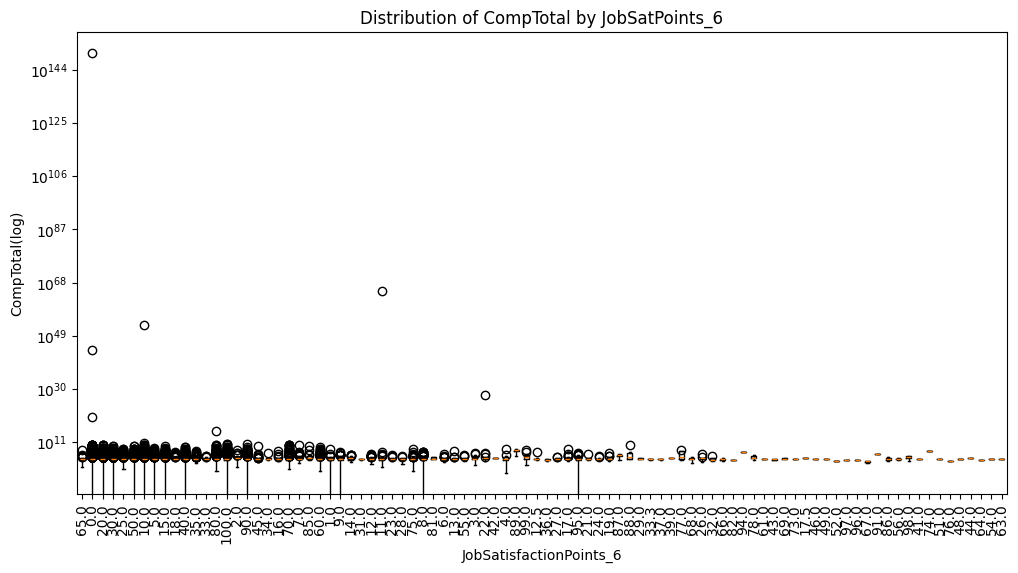

In [56]:
query = "SELECT CompTotal, JobSatPoints_6 FROM main"
df = pd.read_sql_query(query, conn)

#drop Nan
df = df.dropna(subset=['CompTotal','JobSatPoints_6'])
#Boxplot
plt.figure(figsize=(12,6))
plt.boxplot( [df.loc[df['JobSatPoints_6'] == level, 'CompTotal']
     for level in df['JobSatPoints_6'].unique()])
plt.yscale('log') 
plt.xticks(range(1, len(df['JobSatPoints_6'].unique())+1),
           df['JobSatPoints_6'].unique(), rotation=90)
plt.xlabel('JobSatisfactionPoints_6')
plt.ylabel('CompTotal(log)')
plt.title('Distribution of CompTotal by JobSatPoints_6') 
plt.show() 


### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


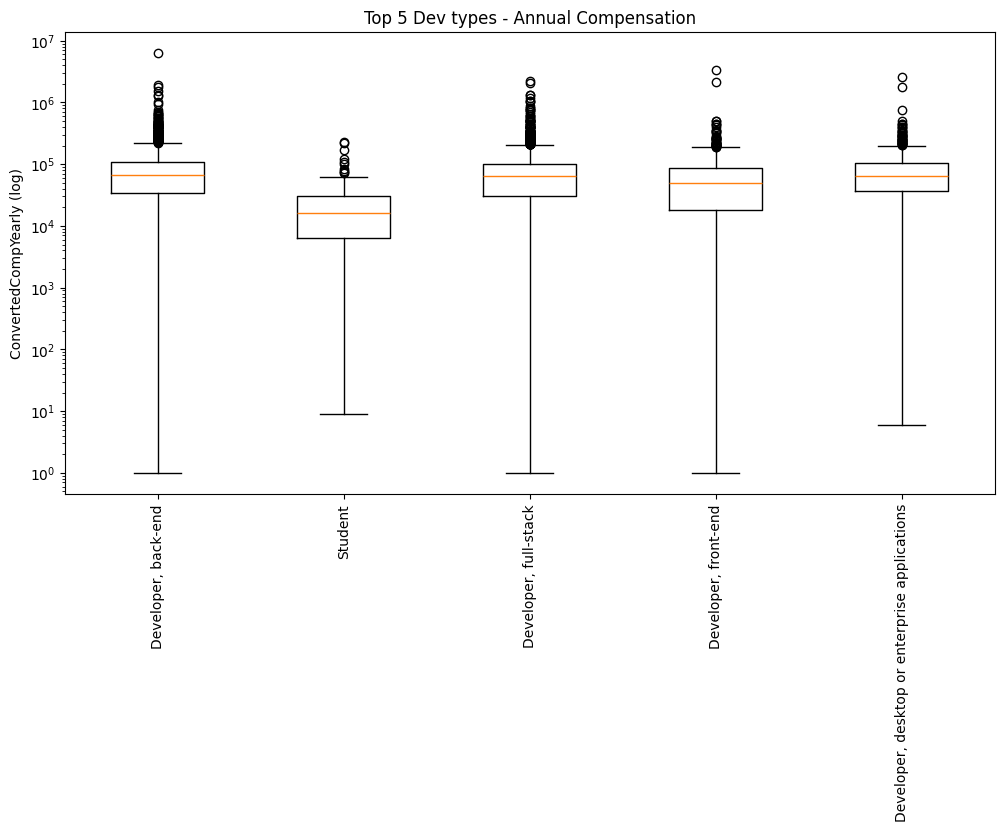

In [67]:
query = """
SELECT DevType, ConvertedCompYearly
FROM main
WHERE DevType IS NOT NULL 
  AND ConvertedCompYearly IS NOT NULL
  AND DevType IN (
        SELECT DevType
        FROM main
        WHERE DevType IS NOT NULL
        GROUP BY DevType
        ORDER BY COUNT(*) DESC
        LIMIT 5
    )
"""
df = pd.read_sql_query(query, conn)
#Boxplot
top_5_dev = df['DevType'].unique()
plt.figure(figsize=(12,6)) 
plt.boxplot([df.loc[df['DevType'] == dev, 'ConvertedCompYearly'] for dev in top_5_dev])
plt.yscale('log') 
plt.xticks(range(1, len(top_5_dev)+1), top_5_dev, rotation=90)
plt.ylabel('ConvertedCompYearly (log)')
plt.title('Top 5 Dev types - Annual Compensation')
plt.show() 

**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


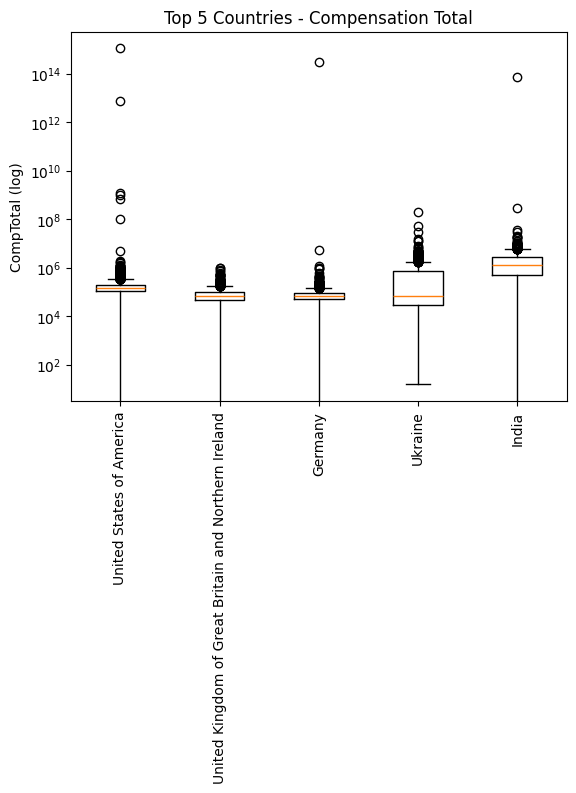

In [74]:
query = """
SELECT Country, CompTotal 
FROM main 
WHERE Country IS NOT NULL
  AND CompTotal IS NOT NULL
  AND Country IN (
        SELECT Country 
        FROM main
        WHERE Country IS NOT NULL
          AND CompTotal IS NOT NULL
        GROUP BY Country 
        ORDER BY COUNT(*) DESC
        LIMIT 5
    )
"""
df = pd.read_sql_query(query, conn) 
#Top 5 Countries
top_5_country = df['Country'].unique()
plt.boxplot([df.loc[df['Country'] == country, 'CompTotal'] for country in top_5_country])
plt.yscale('log')
plt.xticks(range(1, len(top_5_country)+1), top_5_country, rotation=90)
plt.ylabel('CompTotal (log)') 
plt.title('Top 5 Countries - Compensation Total')
plt.show() 


### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


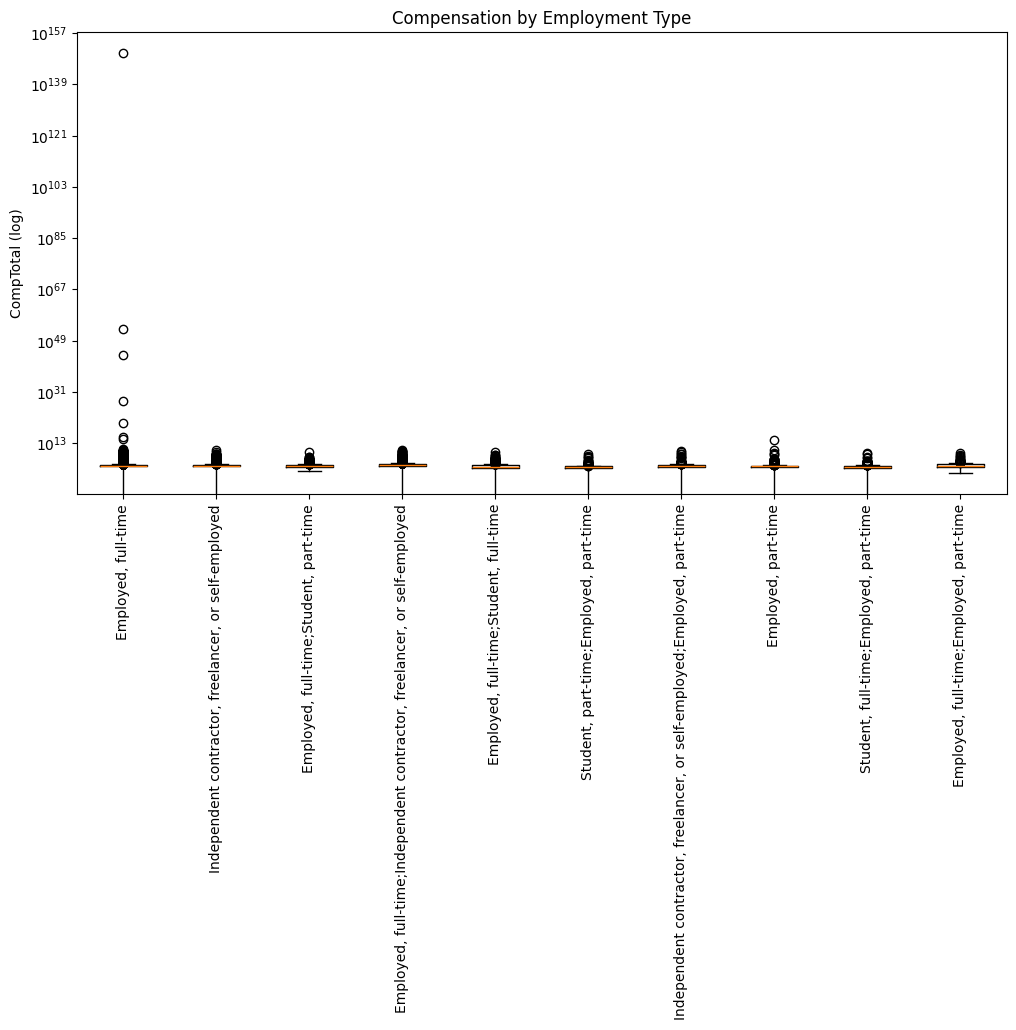

In [87]:
query = "SELECT CompTotal, Employment from main"
df = pd.read_sql_query(query, conn)
# Filtrar datos válidos
df = df.dropna(subset=['CompTotal', 'Employment'])
#Reduce number of categories 
top_emp = df['Employment'].value_counts().head(10).index
df = df[df['Employment'].isin(top_emp)]

# Boxplot por tipo de empleo
plt.figure(figsize=(12,6))
plt.boxplot(
    [df.loc[df['Employment'] == emp, 'CompTotal']
     for emp in df['Employment'].unique()]
)
plt.yscale('log')  # por los outliers
plt.xticks(range(1, len(df['Employment'].unique())+1),
           df['Employment'].unique(),
           rotation=90)
plt.ylabel('CompTotal (log)')
plt.title('Compensation by Employment Type')
plt.show()


**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


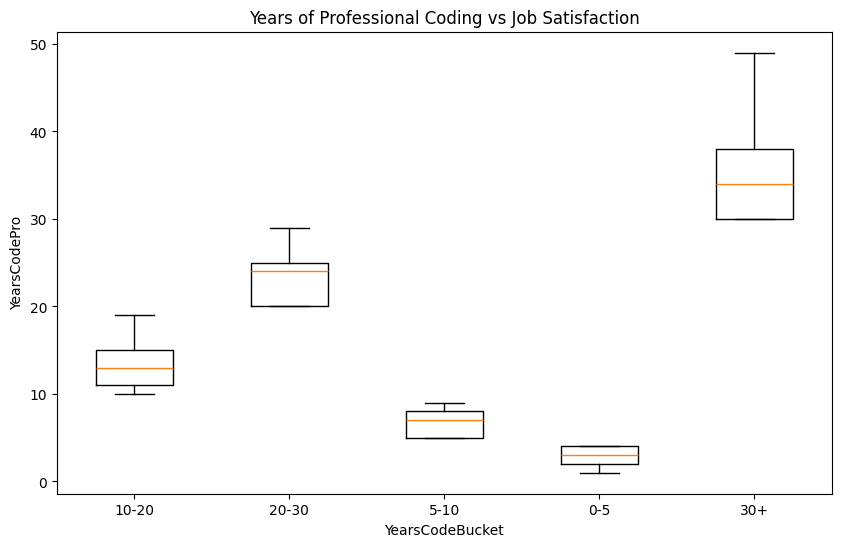

In [102]:
query = "SELECT YearsCodePro, JobSatPoints_6 FROM main" 
df = pd.read_sql_query(query, conn) 
#Drop NaNs
df = df.dropna(subset=['YearsCodePro', 'JobSatPoints_6'])
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
#Drop Nans

#Create buckets for YearsCodePro 
bins = [0, 5, 10, 20, 30, 50]
labels = ['0-5', '5-10', '10-20', '20-30', '30+']
df['YearsCodeBucket'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False)
#drop Nans from YearsCodeBucket
df = df.dropna(subset=['YearsCodeBucket']) 

#Boxplot
plt.figure(figsize=(10,6)) 
plt.boxplot(
    [df.loc[df['YearsCodeBucket'] == bucket, 'YearsCodePro']
     for bucket in df['YearsCodeBucket'].unique()]
)
plt.xticks(range(1, len(df['YearsCodeBucket'].unique())+1),
           df['YearsCodeBucket'].unique())
plt.xlabel('YearsCodeBucket')
plt.ylabel('YearsCodePro')
plt.title('Years of Professional Coding vs Job Satisfaction')
plt.show()

### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [103]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
